In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# import math
import pandas as pd
# import imutils.paths as path
from tqdm import tqdm


In [6]:
from google.colab import drive
drive.mount('/content/drive')
PATH=%cd '/content/drive/MyDrive/dataset/Crop Musi'
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/dataset/Crop Musi
Musi001.jpg  Musi085.jpg  Musi169.jpg  Musi253.jpg  Musi337.jpg  Musi421.jpg
Musi002.jpg  Musi086.jpg  Musi170.jpg  Musi254.jpg  Musi338.jpg  Musi422.jpg
Musi003.jpg  Musi087.jpg  Musi171.jpg  Musi255.jpg  Musi339.jpg  Musi423.jpg
Musi004.jpg  Musi088.jpg  Musi172.jpg  Musi256.jpg  Musi340.jpg  Musi424.jpg
Musi005.jpg  Musi089.jpg  Musi173.jpg  Musi257.jpg  Musi341.jpg  Musi425.jpg
Musi006.jpg  Musi090.jpg  Musi174.jpg  Musi258.jpg  Musi342.jpg  Musi426.jpg
Musi007.jpg  Musi091.jpg  Musi175.jpg  Musi259.jpg  Musi343.jpg  Musi427.jpg
Musi008.jpg  Musi092.jpg  Musi176.jpg  Musi260.jpg  Musi344.jpg  Musi428.jpg
Musi009.jpg  Musi093.jpg  Musi177.jpg  Musi261.jpg  Musi345.jpg  Musi429.jpg
Musi010.jpg  Musi094.jpg  Musi178.jpg  Musi262.jpg  Musi346.jpg  Musi430.jpg
Musi011.jpg  Musi095.jpg  Musi179.jpg  Musi263.jpg  Musi347.

In [7]:
import os 
from natsort import natsorted 
file_names = os.listdir(PATH)
# print(file_names)
natsort_file_names = natsorted(file_names)
print(natsort_file_names)

['Musi001.jpg', 'Musi002.jpg', 'Musi003.jpg', 'Musi004.jpg', 'Musi005.jpg', 'Musi006.jpg', 'Musi007.jpg', 'Musi008.jpg', 'Musi009.jpg', 'Musi010.jpg', 'Musi011.jpg', 'Musi012.jpg', 'Musi013.jpg', 'Musi014.jpg', 'Musi015.jpg', 'Musi016.jpg', 'Musi017.jpg', 'Musi018.jpg', 'Musi019.jpg', 'Musi020.jpg', 'Musi021.jpg', 'Musi022.jpg', 'Musi023.jpg', 'Musi024.jpg', 'Musi025.jpg', 'Musi026.jpg', 'Musi027.jpg', 'Musi028.jpg', 'Musi029.jpg', 'Musi030.jpg', 'Musi031.jpg', 'Musi032.jpg', 'Musi033.jpg', 'Musi034.jpg', 'Musi035.jpg', 'Musi036.jpg', 'Musi037.jpg', 'Musi038.jpg', 'Musi039.jpg', 'Musi040.jpg', 'Musi041.jpg', 'Musi042.jpg', 'Musi043.jpg', 'Musi044.jpg', 'Musi045.jpg', 'Musi046.jpg', 'Musi047.jpg', 'Musi048.jpg', 'Musi049.jpg', 'Musi050.jpg', 'Musi051.jpg', 'Musi052.jpg', 'Musi053.jpg', 'Musi054.jpg', 'Musi055.jpg', 'Musi056.jpg', 'Musi057.jpg', 'Musi058.jpg', 'Musi059.jpg', 'Musi060.jpg', 'Musi061.jpg', 'Musi062.jpg', 'Musi063.jpg', 'Musi064.jpg', 'Musi065.jpg', 'Musi066.jpg', 'Musi067.

Load: 100%|██████████| 500/500 [00:08<00:00, 59.16it/s] 


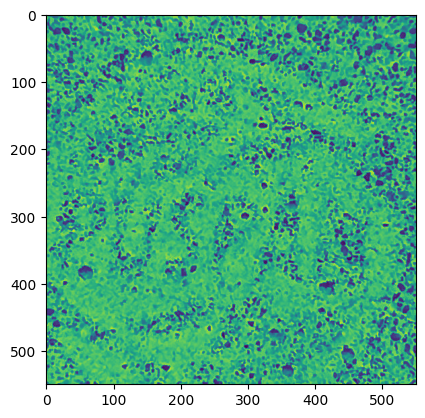

In [8]:
# images croping 550px x 550px 
data =[]
for i in tqdm(natsort_file_names,desc="Load"):
  imgg = cv.imread(i)
  img = cv.cvtColor(imgg, cv.COLOR_BGR2GRAY)
  #a = cv.resize(img, (550, 550))
  data.append(img)

  plt.imshow(img)

In [9]:
import numpy as np
import pandas as pd
from skimage.feature import greycomatrix, greycoprops

# Fungsi untuk ekstraksi GLCM
def extract_glcm_features(image, distances, angles, properties):
    # Hitung matriks GLCM
    glcm = greycomatrix(image, distances, angles, symmetric=True, normed=True)
    
    # Ekstraksi fitur dari matriks GLCM
    features = []
    for prop in properties:
        prop_values = greycoprops(glcm, prop)
        features.extend(prop_values.flatten())
    
    return features

distances = [1]  # Jarak
angles = [45, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut
properties = ['energy', 'contrast', 'homogeneity', 'correlation']  # Fitur yang ingin diekstraksi

all_features = []
for img in tqdm(data, desc="Ekstraksi GLCM"):
    features = extract_glcm_features(img, distances, angles, properties)
    all_features.append(features)

# Menyimpan hasil ekstraksi fitur ke dalam DataFrame
column_names = []
for prop in properties:
    for angle in angles:
        column_names.append(f"{prop}_{int(np.degrees(angle))}deg")
df = pd.DataFrame(all_features, columns=column_names)

# Menampilkan 4 kolom fitur yang diambil
selected_columns = ['energy_45deg', 'contrast_45deg', 'homogeneity_45deg', 'correlation_45deg']
selected_features = df[selected_columns]
print(selected_features)
# Menyimpan DataFrame ke dalam file Excel
output_file = 'hasil_ekstraksi.xlsx'  # Nama file output Excel
selected_features.to_excel(output_file, index=False)

print("Data berhasil disimpan dalam file Excel:", output_file)



Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0

     energy_45deg  contrast_45deg  homogeneity_45deg  correlation_45deg
0        0.014486      480.411595           0.099098           0.746612
1        0.011310      803.658336           0.075065           0.680225
2        0.012391      616.155816           0.083728           0.719695
3        0.015460      386.048066           0.103888           0.762437
4        0.011470      800.356465           0.074545           0.659311
..            ...             ...                ...                ...
495      0.015211      955.521060           0.086475           0.692099
496      0.017918      729.529109           0.100574           0.727008
497      0.014821     1030.586219           0.084345           0.682175
498      0.018374      666.394833           0.103079           0.740777
499      0.016570      817.911006           0.093207           0.712423

[500 rows x 4 columns]
Data berhasil disimpan dalam file Excel: hasil_ekstraksi.xlsx
